<a href="https://colab.research.google.com/github/sorivma/encryptions/blob/master/QuickDrawDs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! echo '{"username":"kekasmansenya","key":"edc80753fa0403c4c7c8c1adde24d7d5"}' > ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d kekasmansenya/quickdraw

100% 2.64G/2.64G [01:11<00:00, 60.1MB/s]
100% 2.64G/2.64G [01:11<00:00, 39.7MB/s]


In [ ]:
! unzip quickdraw.zip -d kaggle/

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: kaggle/dataset/val/zebra/zebra-5499.jpg  
  inflating: kaggle/dataset/val/zebra/zebra-55.jpg  
  inflating: kaggle/dataset/val/zebra/zebra-550.jpg  
  inflating: kaggle/dataset/val/zebra/zebra-5500.jpg  
  inflating: kaggle/dataset/val/zebra/zebra-5501.jpg  
  inflating: kaggle/dataset/val/zebra/zebra-5502.jpg  
  inflating: kaggle/dataset/val/zebra/zebra-5503.jpg  
  inflating: kaggle/dataset/val/zebra/zebra-5504.jpg  
  inflating: kaggle/dataset/val/zebra/zebra-5505.jpg  
  inflating: kaggle/dataset/val/zebra/zebra-5506.jpg  
  inflating: kaggle/dataset/val/zebra/zebra-5507.jpg  
  inflating: kaggle/dataset/val/zebra/zebra-5508.jpg  
  inflating: kaggle/dataset/val/zebra/zebra-5509.jpg  
  inflating: kaggle/dataset/val/zebra/zebra-551.jpg  
  inflating: kaggle/dataset/val/zebra/zebra-5510.jpg  
  inflating: kaggle/dataset/val/zebra/zebra-5511.jpg  
  inflating: kaggle/dataset/val/zebra/zebra-5512.jpg  
 

In [ ]:
from keras.utils import image_dataset_from_directory
from matplotlib import *
from pandas import DataFrame
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [ ]:
#Определяем константы

#Каталог с изображениями для тренировки
train_dir = "/content/kaggle/dataset/train"
#Каталог с изображениями для валидации
val_dir = "/content/kaggle/dataset/val"
#Каталог с изображениями для тестирования
test_dir = "/content/kaggle/dataset/test"
#Размеры изображения
img_width, img_height = 255, 255
#Размерность тензора изображения (Изображения ч/б => канал один)
input_shape = (img_width, img_height, 1)
#Количество эпох
epochs = 1
#Размерность выборки
batch_size = 64
#Количество изображений
train_samples_nb = 300000
#Количество изображений для валидации
val_samples_nb = 150000
#Количество изображений для тестирования
test_samples_nb = 50000

In [ ]:
train_ds = image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale",
)

Found 300000 files belonging to 10 classes.


In [ ]:
for image_batch, label_batch in train_ds:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(64, 255, 255, 1)
(64,)


TypeError: ignored

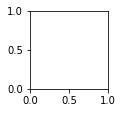

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
val_ds = image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale",
)

Found 149990 files belonging to 10 classes.


In [ ]:
for image_batch, label_batch in val_ds:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(64, 255, 255, 1)
(64,)


In [ ]:
from keras.layers import Rescaling

normalization_layer = Rescaling(1. / 255, input_shape=(img_height, img_width, 1))

In [ ]:
from keras.losses import SparseCategoricalCrossentropy

classes_num = 10

model = Sequential([
    normalization_layer,
    Conv2D(16,3,padding="same",activation='relu'),
    MaxPooling2D(),
    Conv2D(32,3,padding="same",activation="relu"),
    MaxPooling2D(),
    Conv2D(64,3,padding="same",activation="relu"),
    MaxPooling2D(),
    Conv2D(128,3,padding="same",activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(classes_num)
])

model.compile(
    optimizer="adam",
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 255, 255, 1)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 255, 255, 16)      160       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 127, 127, 32)      4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 63, 63, 64)       

In [ ]:
from tensorflow.python.framework.config import list_physical_devices

print(list_physical_devices("GPU"))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

4688/4688 [==============================] - 551s 111ms/step - loss: 0.1591 - accuracy: 0.9513 - val_loss: 0.0799 - val_accuracy: 0.9764


In [ ]:
test_ds = image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale",
)

model.evaluate(
    test_ds,
    verbose=1
)

Found 50000 files belonging to 10 classes.
782/782 [==============================] - 45s 57ms/step - loss: 0.0775 - accuracy: 0.9764


[0.07751505076885223, 0.9764400124549866]

In [78]:
from keras.utils import load_img
img = load_img(
    "test8.jpg", target_size=(img_height, img_width),color_mode="grayscale"
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [48]:
class_names = train_ds.class_names

In [79]:
import tensorflow as tf
import numpy as np

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 20ms/step
This image most likely belongs to stairs with a 85.26 percent confidence.


In [60]:
model.save("/kaggle/quickdrowmodel")